In [67]:
!pip install matplotlib seaborn pandas numpy 


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [69]:
df = pd.read_csv('7edge.csv')

In [70]:
df.info()
df['Branch'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sr.No.               179 non-null    int64  
 1   Full Name            179 non-null    object 
 2   Email id             179 non-null    object 
 3   Contact Number       179 non-null    int64  
 4   USN                  179 non-null    object 
 5   Branch               179 non-null    object 
 6   10th%                179 non-null    object 
 7   12th%                177 non-null    object 
 8   Diploma%             121 non-null    object 
 9   BE%                  179 non-null    object 
 10  B.E CGPA             179 non-null    float64
 11  Roles applying for?  179 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 16.9+ KB


61

In [71]:
df = df.dropna(subset='12th%')

In [72]:
for i, row in df.iterrows():
    if row['Roles applying for?'].__contains__('Analyst'):
        df.loc[i, 'Analyst'] = True

/tmp/ipykernel_10174/717508953.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Analyst'] = True


In [73]:
df['Analyst'] = df.Analyst.fillna(False)
df['Analyst'].value_counts()

Analyst
False    160
True      17
Name: count, dtype: int64

In [74]:
sns.set_style('dark')
sns.set_palette('husl')

In [79]:
df['Branch'] = df['Branch'].str.lower().str.strip().str.replace('&','and').str.replace('computer science','cse').str.replace('data science','ds').str.replace('( ',' (').str.replace('ai&ml','aiml').str.replace('-',' ').str.replace('electronicse','electronics').str.replace('enginnering','engineering').str.replace('and','').str.replace('engineering','').str.replace('csee','cse').str.replace('communications','communication').str.replace('information science','ise').str.replace('electronics communication','ec').str.replace('ece','ec').str.replace('electronics  communication','ec').str.replace('cse ds','cse (ds)').str.replace('cse(aiml)','aiml').str.replace('cse aiml','aiml').str.replace('cse(ds)','cse (ds)').str.replace('cse (ds)','ds').str.replace('cse  aiml','aiml').str.replace('cse','cs').str.strip()
df['Branch'].unique()

array(['aiml', 'cs', 'ds', 'ec', 'ise', 'mechanical'], dtype=object)

Text(0.5, 1.0, 'Candidates applying for Data Analyst Role v/s Students in various Departments')

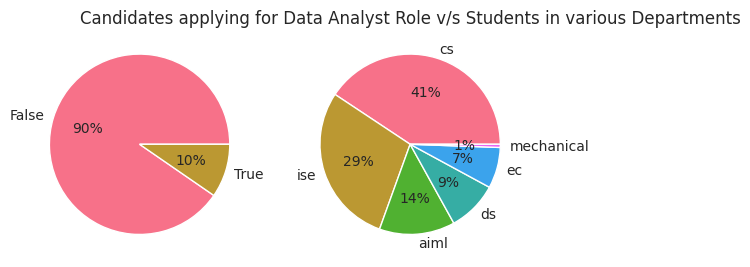

In [80]:
fig, ax = plt.subplots(1,2)
ax[0].pie(df['Analyst'].value_counts().values, labels=df['Analyst'].value_counts().index, autopct="%.f%%")
ax[1].pie(df['Branch'].value_counts().head(6).values, labels=df['Branch'].value_counts().head(6).index, autopct="%.f%%")
plt.title('Candidates applying for Data Analyst Role v/s Students in various Departments')